In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

|Study          | Treatment group |   Control group  |
|---------------|-----------------|------------------|
|Di Rienzo 2014 |     20 / 23     |        9 / 15    |
|Galli 1994     |     10 / 16     |       11 / 18    |
|Kaufman 1974   |     13 / 16     |        4 / 10    |
|Qin 2014       |     35 / 45     |       21 / 39    |
|Sanchez 2012   |     22 / 31     |       12 / 29    |
|Silny 2006     |      7 / 10     |        0 / 10    |
|**Totals**     |    107 / 141    |       57 / 121   |


# The Control Group Data

In [2]:
#from the table above, we can get the following data from the control group:
patients_number = [15, 18, 10, 39, 29, 10]
real_data_success = [9, 11, 4, 21, 12, 0]

# The posterior distribution

In [3]:
# Beta posterior distribution taken from from class 8.1:
posterior_distribution = stats.beta(58, 65) 

# Generate Samples from distribution
Here I will generate samples of theta (probability of success) from the posterior and then I will use these samples to generate a replicated data of the number of successful recoveries using the binomial likelihood function 

In [4]:
def generate_replicated_data():
    sample = []
    theta = posterior_distribution.rvs() #generating one theta from the distribution
    
    for n in patients_number:
        sample.append(stats.binom(n, theta).rvs()) #using the theta we generated above to generate replicated data
        # using the binomial likelihood function
    return sample

replicated_data = [generate_replicated_data() for i in range(1000)] #generating 1000 set of replicated data  

# Test Statiscal Function
I will use the geometric mean as the test statistic function. I will test if the model describes the geometric mean of the data well or not. The geometric mean is an average that indicates the typical value or the central tendency of the data by taking the nth squre root of the product of the data points where n is the number of the data points. 

In [5]:
def statistic_function(data):
    return stats.gmean(data) #return the geometric mean of the data

# Checking the model and plotting the histogram

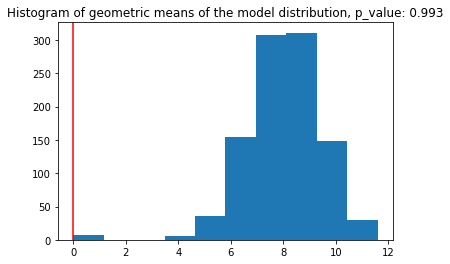

In [6]:
statistic_real = statistic_function(real_data_success)# Getting the geometric mean of the real data

statistic_replicated = np.array([statistic_function(i) for i in replicated_data]) # Getting the geometric mean of the
#replicated data

#plotting the histogram
plt.hist(statistic_replicated)#the histogram
plt.axvline(statistic_real, color='red') #the line of the real data

p=((statistic_replicated>statistic_real).sum())/len(statistic_replicated)#the p_value (proportion of histogram to the right
# of the line)

plt.title(f'Histogram of geometric means of the model distribution, p_value: {p}')
plt.show()

We see that the p_value is 0.993 which is larger than 0.95 which means that the model does a poor job in describing the geometric mean of the dataset. That happens because the real dataset has a 0 as one of the values which outputs a 0 geometric mean(since the geometric mean multiplies all these values) and then the model does a poor job at predicting that 0 value for one of the studies.